# **EDA — Valorant Champions 2025 Paris (Player & Match Analysis)**

#### Glossary

Term | Meaning / Full Form
--- | ---
Valorant | A 5v5 tactical shooter game by Riot Games. Two teams compete to win rounds by planting or defusing a “spike” (bomb) or eliminating the other team.
Map | A game arena or location where matches take place (e.g., Ascent, Bind). Each match is played on one or more maps.
Agent | The character a player chooses, each with unique abilities and roles (like controller, initiator, sentinel, duelist).
ACS (Average Combat Score) | A performance metric combining kills, assists, and damage; higher values mean stronger impact.
ADR (Average Damage per Round) | The average amount of damage a player deals each round.
K/D Ratio (Kill/Death Ratio) | Kills divided by deaths — measures combat effectiveness.
KPR (Kills per Round) | Average number of kills a player earns per round.
FKPR (First Kill per Round) | How often a player gets the first kill in a round — important for early advantage.
FDPR (First Death per Round) | How often a player is the first to die in a round — indicates risk level or aggression.
HS% (Headshot Percentage) | Percentage of kills achieved with headshots; reflects aim precision.
KAST (% Rounds with Kill, Assist, Survived, or Traded) | A consistency measure: how often a player contributes to a round’s outcome.
CL% (Clutch Percentage) | How often a player wins a round when being the last one alive on their team.
Economy Round / Buy Type | The type of round based on how much money a team spends (e.g., eco = saving money, full buy = best weapons/armor).

---
###  **1. Introduction**

Valorant is a competitive esports game which features a 5v5 first person shooter setting. The game has gained immense popularity since its release in 2020.

I will analyze the Valorant Champions 2025 Paris tournament to understand how player performance, economy factors, and map context relate to outcomes.

My goal is to explore this data using statistics and visualizations to uncover patterns and insights that help predict the winning outcome, the play style of certain teams and individuals, etc.

The outcomes of this project will be beneficial to coaches, players and esports analysts and commentators.

Some guiding questions, that can be uncovered using the data include:

*   How do key player metrics vary (ACS, ADR, HS%, KAST, KPR, FKPR, FDPR)?

* Do players cluster into certain roles (e.g., entry fraggers vs consistency / utility anchors)?


* How do economy events pistol-round wins and buy-type conversions—relate to map wins?

* How much does first-kill advantage translate into map win probability?


---
###  **2. Data**

**2.1 Data source**

Primary source: Kaggle — “Valorant Champions 2025 Paris - player & match data”. I will use only this dataset and its included CSV files for definitions and schema. [1] [link](https://www.kaggle.com/datasets/piyush86kumar/valorant-champions-tour-2025-paris?select=economy_data.csv)


It includes structured data covering matches, player statistics, map-level insights, agent usage, team economy, and performance benchmarks. The dataset is designed for esports analysts, data scientists, and enthusiasts who want to explore competitive strategies, player trends, and team dynamics.<br>

Datasets


1. Match-level: matches.csv, and detailed_matches_overview.csv


2. Player-level: player_stats.csv, detailed_matches_player_stats.csv and performance_data.csv.



3. Team - economy - map: economy_data.csv.

<br>

**2.2 Data Collection**

The dataset combines publicly available tournament statistics into CSV files with consistent identifiers. This data is open source, and scraped from the Valorant Community websites.

Variables

1. Player performance: acs, adr, kd_ratio, kpr, fkpr, fdpr, hs_percent, kast, cl_percent, kills/deaths/assists, etc.


2. Economy: pistol wins; eco/semi-eco/semi-buy/full-buy counts & wins; match_id.


3. Outcomes & context: map winner/score/duration/picked_by; map-level attack/defense win %.

<br>




### **2.4 Description of the data (size & structure)**


Files include:
- player_stats.csv,
- economy_data.csv,  
- detailed_matches_maps.csv,
- detailed_matches_player_stats.csv.

---

Numeric vs categorical:


1. Numeric: ACS, ADR, KAST (%), HS% (%), KPR, FKPR, FDPR, kills/deaths/assists, FK/FD counts, economy totals/wins, durations.


2. Categorical: map names, agents, teams, winner, picked_by, stage, format.

---


### **2.5 Data Quality Checks**

1. Duplicates/IDs — Key Duplicate Checks - No duplicates found

2. Missingness — inspected NAs in all datasets, Handled missing values that were found



# 3. EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
player_stats = pd.read_csv('data/player_stats.csv')
detailed_player = pd.read_csv('data/detailed_matches_player_stats.csv')
maps_stats = pd.read_csv('data/detailed_matches_maps.csv')
economy = pd.read_csv('data/economy_data.csv')

In [3]:
print(f"\n Loaded 4 datasets successfully")
print(f"  - player_stats: {player_stats.shape}")
print(f"  - detailed_player: {detailed_player.shape}")
print(f"  - map_stats: {maps_stats.shape}")
print(f"  - economy: {economy.shape}")


 Loaded 4 datasets successfully
  - player_stats: (81, 25)
  - detailed_player: (1220, 26)
  - map_stats: (88, 7)
  - economy: (224, 8)


In [4]:
print(f"\n1. player_stats.csv: {player_stats.shape}")
print("   Unit of observation: Individual player tournament performance")
print("   Contains: Aggregated player statistics across all matches")

print(f"\n2. detailed_matches_player_stats.csv: {detailed_player.shape}")
print("   Unit of observation: Player performance in a specific map")
print("   Contains: Per-map individual player statistics")

print(f"\n3. maps_stats.csv: {maps_stats.shape}")
print("   Unit of observation: Individual map result")
print("   Contains: Map outcomes, scores, and metadata")

print(f"\n4. economy_data.csv: {economy.shape}")
print("   Unit of observation: Team's economy performance per map")
print("   Contains: Buy types, pistol rounds, win rates")


1. player_stats.csv: (81, 25)
   Unit of observation: Individual player tournament performance
   Contains: Aggregated player statistics across all matches

2. detailed_matches_player_stats.csv: (1220, 26)
   Unit of observation: Player performance in a specific map
   Contains: Per-map individual player statistics

3. maps_stats.csv: (88, 7)
   Unit of observation: Individual map result
   Contains: Map outcomes, scores, and metadata

4. economy_data.csv: (224, 8)
   Unit of observation: Team's economy performance per map
   Contains: Buy types, pistol rounds, win rates


In [5]:
# Cleaning % signs in data

def clean_percentage(col):

    """e.g. Convert '26%' to 0.26"""
    
    if col.dtype == 'object':
        return col.str.rstrip('%').astype(float) / 100
    return col

player_stats['kast_num'] = clean_percentage(player_stats['kast'])
player_stats['hs_percent_num'] = clean_percentage(player_stats['hs_percent'])
player_stats['cl_percent_num'] = clean_percentage(player_stats['cl_percent'])
print("   Converted percentage strings to numeric in player_stats")


   Converted percentage strings to numeric in player_stats


In [6]:
# Parse economy columns: "15 (9)" -> total=15, wins=9
def parse_economy_col(col):
    
    """Parse '15 (9)' into total=15, wins=9"""

    df_temp = col.str.extract(r'(\d+)\s*\((\d+)\)')
    return df_temp[0].astype(int), df_temp[1].astype(int)

economy['eco_total'], economy['eco_wins'] = parse_economy_col(economy['Eco (won)'])
economy['semi_eco_total'], economy['semi_eco_wins'] = parse_economy_col(economy['Semi-eco (won)'])
economy['semi_buy_total'], economy['semi_buy_wins'] = parse_economy_col(economy['Semi-buy (won)'])
economy['full_buy_total'], economy['full_buy_wins'] = parse_economy_col(economy['Full buy(won)'])
print("   Parsed economy win/total columns")


   Parsed economy win/total columns


In [7]:
# Create win rate columns
import numpy as np

economy['eco_winrate'] = economy['eco_wins'] / economy['eco_total'].replace(0, np.nan)
economy['semi_eco_winrate'] = economy['semi_eco_wins'] / economy['semi_eco_total'].replace(0, np.nan)
economy['semi_buy_winrate'] = economy['semi_buy_wins'] / economy['semi_buy_total'].replace(0, np.nan)
economy['full_buy_winrate'] = economy['full_buy_wins'] / economy['full_buy_total'].replace(0, np.nan)
print("   Calculated win rates for each economy type")

   Calculated win rates for each economy type


In [8]:
# Parse map scores
maps_stats['winning_score'] = maps_stats['score'].str.extract(r'(\d+)').astype(int)
maps_stats['losing_score'] = maps_stats['score'].str.extract(r'-\s*(\d+)').astype(int)
maps_stats['score_diff'] = maps_stats['winning_score'] - maps_stats['losing_score']
print("   Parsed map scores into winning/losing/difference")


   Parsed map scores into winning/losing/difference


Basic data conversion, feature engineering, complete.

Proper Data Cleanup

- Converts "26%" → 0.26
- Parses "15 (9)" → total=15, wins=9
- Extracts score from "13 - 9" → winning=13, losing=9, diff=4

---

## 3.1 Visualizations

           acs      adr  kd_ratio     kpr    fkpr  hs_percent_num  kast_num
count   81.000   81.000    81.000  81.000  81.000          81.000    81.000
mean   189.753  124.253     0.969   0.663   0.098           0.286     0.700
std     26.633   16.526     0.162   0.100   0.050           0.053     0.043
min    140.800   92.400     0.590   0.450   0.020           0.170     0.590
25%    171.000  113.500     0.880   0.600   0.060           0.250     0.670
50%    190.200  124.100     0.970   0.670   0.090           0.280     0.700
75%    211.000  135.500     1.060   0.740   0.130           0.320     0.730
max    261.600  164.700     1.660   0.970   0.210           0.410     0.790

 Saved: player_distributions.png


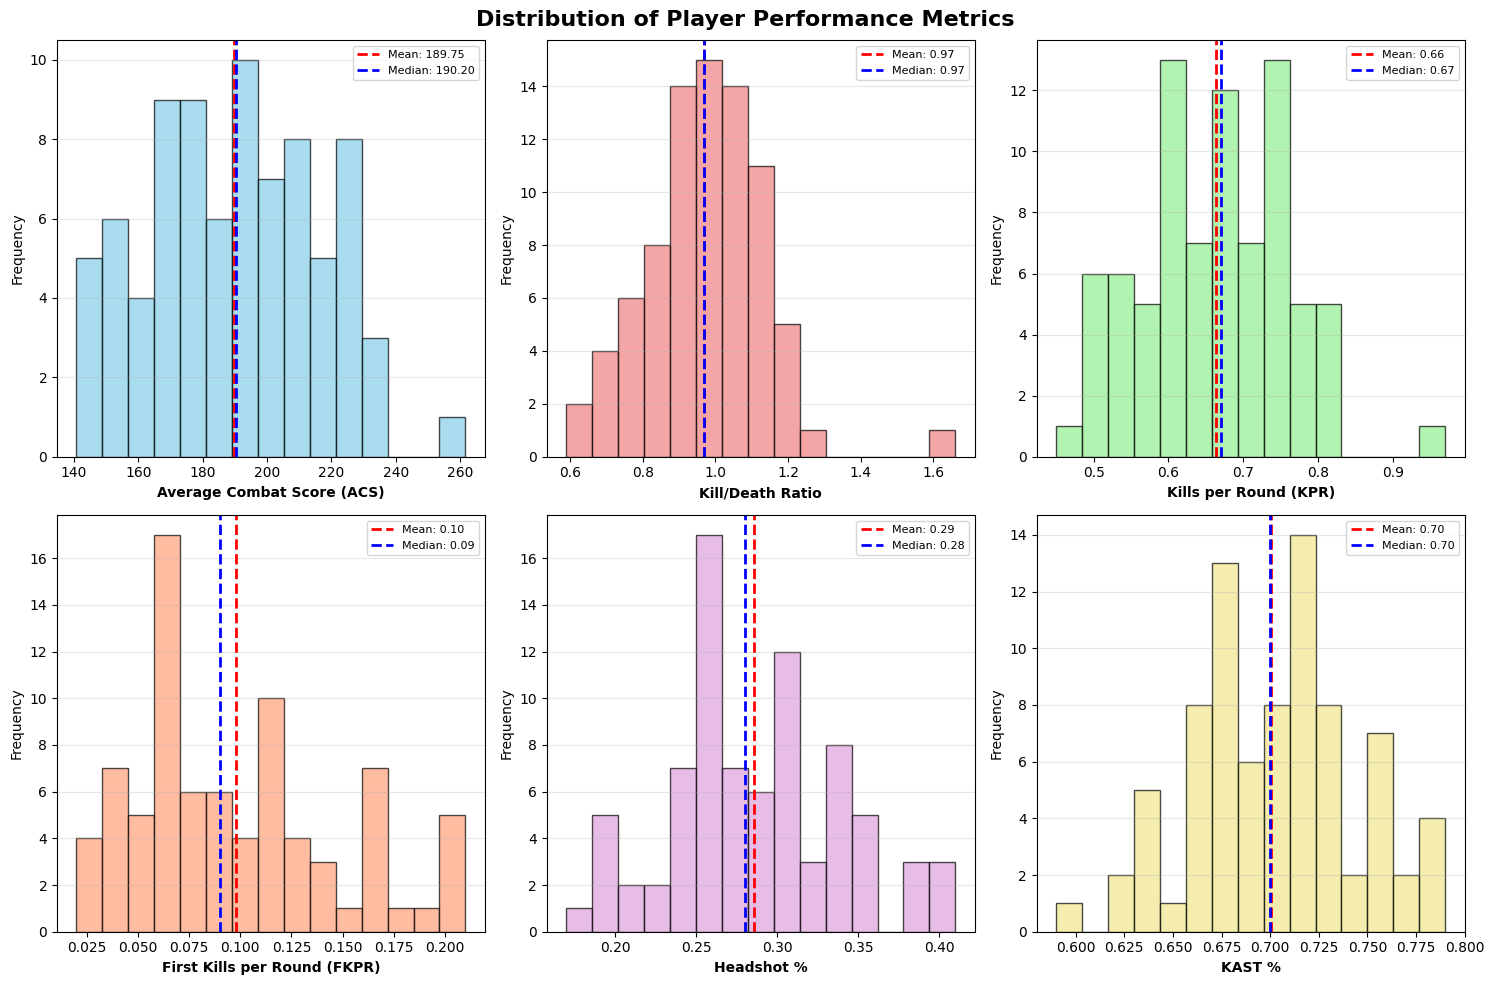

In [9]:
import matplotlib.pyplot as plt

key_metrics = ['acs', 'adr', 'kd_ratio', 'kpr', 'fkpr', 'hs_percent_num', 'kast_num']
summary = player_stats[key_metrics].describe()
print(summary.round(3).to_string())

# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Player Performance Metrics', fontsize=16, fontweight='bold')

metrics_plot = [
    ('acs', 'Average Combat Score (ACS)', 'skyblue'),
    ('kd_ratio', 'Kill/Death Ratio', 'lightcoral'),
    ('kpr', 'Kills per Round (KPR)', 'lightgreen'),
    ('fkpr', 'First Kills per Round (FKPR)', 'lightsalmon'),
    ('hs_percent_num', 'Headshot %', 'plum'),
    ('kast_num', 'KAST %', 'khaki')
]

for idx, (col, title, color) in enumerate(metrics_plot):
    ax = axes[idx // 3, idx % 3]
    data = player_stats[col].dropna()

    ax.hist(data, bins=15, color=color, edgecolor='black', alpha=0.7)
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2,
               label=f'Mean: {data.mean():.2f}')
    ax.axvline(data.median(), color='blue', linestyle='--', linewidth=2,
               label=f'Median: {data.median():.2f}')

    ax.set_xlabel(title, fontsize=10, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('player_distributions.png', dpi=300, bbox_inches='tight')
print("\n Saved: player_distributions.png")
plt.show()



## 3.1.1 Visualizations Analysis

**1. Average Combat Score (ACS)**

- Range: 140-260 points
- Distribution: Roughly normal (bell-shaped) centered around 190-200
- Mean: 189.75, Median: 190.20 (very close = symmetric distribution)
- Interpretation: Most players score between 180-210 ACS, with a few elite performers above 240

<br>

**2. Kill/Death Ratio (K/D)**

- Range: 0.6 to 1.6+
- Distribution: Right-skewed (tail extends right)
- Mean = Median: Both at 0.97 (perfectly balanced)
- Interpretation: Most players are around 1.0 K/D (kill as much as they die), with some standouts above 1.4

<br>


**3. Kills per Round (KPR)**

- Range: 0.5 to 0.9 kills/round
- Distribution: Fairly normal, centered at 0.66-0.67
- Mean: 0.66, Median: 0.67
- Interpretation: On average, players get about 2 kills every 3 rounds

<br>

**4. First Kills per Round (FKPR)**

- Range: 0.025 to 0.20 first kills/round
- Distribution: Heavy left-skew with a large spike around 0.075-0.10
- Mean: 0.10, Median: 0.09
- Interpretation: Most players get first kills in ~10% of rounds. Entry fraggers would be on the right tail (0.15-0.20)

<br>

**5. Headshot Percentage (HS%)**

- Range: 15% to 40%
- Distribution: Normal distribution centered around 28-29%
- Mean: 0.29, Median: 0.28
- Interpretation: About 1 in 3-4 kills are headshots for most players. Values above 35% indicate exceptional aim

<br>

**6. KAST % (Kill/Assist/Survive/Trade percentage)**

- Range: 66% to 80%
- Distribution: Left-skewed (most players clustered at high values)
- Mean = Median: Both at 0.70 (70%)
- Interpretation: Most players contribute meaningfully to 70% of rounds. Higher values (75%+) indicate consistent, high-impact players

## 3.2 Correlation Analysis



--- Correlation Analysis ---
 Saved: correlation_matrix.png


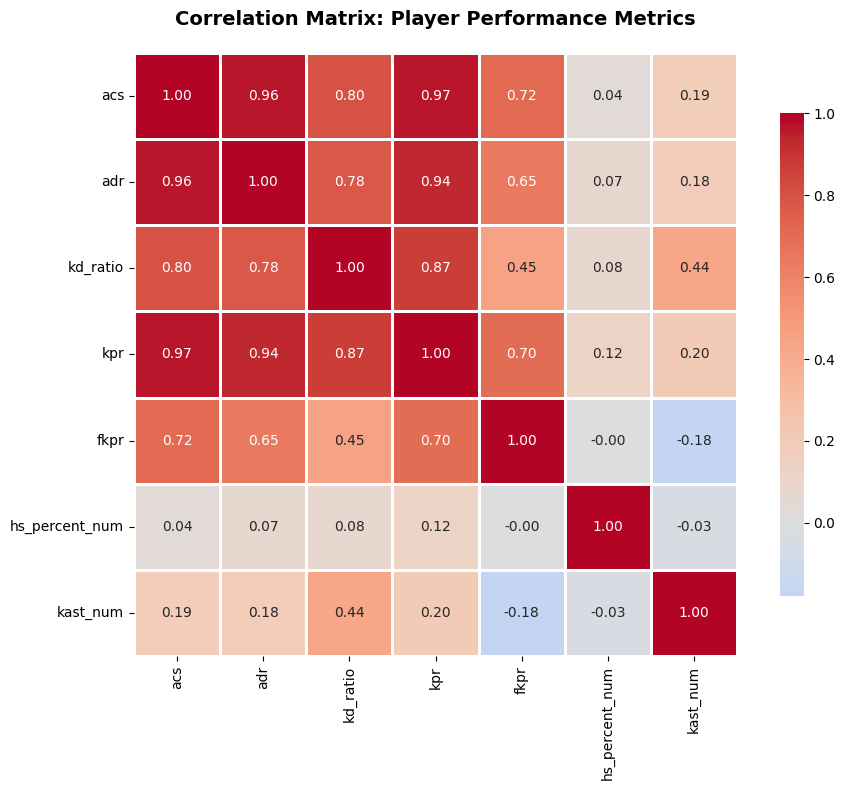

In [10]:
# Correlation analysis
import seaborn as sns

print("\n--- Correlation Analysis ---")
corr_metrics = ['acs', 'adr', 'kd_ratio', 'kpr', 'fkpr', 'hs_percent_num', 'kast_num']
corr_matrix = player_stats[corr_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix: Player Performance Metrics', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
print(" Saved: correlation_matrix.png")
plt.show()



Strongest Correlations:
 - acs <-> kpr: r = 0.967
- acs <-> adr: r = 0.962
 -  adr <-> kpr: r = 0.935
 - kd_ratio <-> kpr: r = 0.870
 - acs <-> kd_ratio: r = 0.801

## 3.3 Top Performers


In [11]:
print("\n--- Top 10 Players by ACS ---\n")
top10 = player_stats.nlargest(10, 'acs')[['player_name', 'team', 'acs', 'adr', 'kd_ratio', 'kpr']]
print(top10.to_string(index=False))



--- Top 10 Players by ACS ---

player_name team   acs   adr  kd_ratio  kpr
      aspas MIBR 261.6 164.7      1.66 0.97
     ZmjjKK  EDG 237.4 143.5      1.08 0.82
   SpiritZ1  DRG 237.0 155.7      1.03 0.82
    jawgemo   G2 230.4 141.7      1.09 0.80
     zekken  SEN 229.3 157.7      0.94 0.75
     kaajak  FNC 227.1 147.9      1.20 0.82
      RieNs   TH 226.1 148.9      1.14 0.79
      brawk  NRG 224.6 144.7      1.17 0.73
     Jinggg  PRX 224.3 146.0      1.10 0.78
  Flashback  DRX 223.1 145.1      1.12 0.80


## 3.4 First Kill Impact

In [12]:
print("\n--- 4.2 First Kill Impact Analysis ---")

# FK/FD differential
player_stats['fk_fd_diff'] = player_stats['fkpr'] - player_stats['fdpr']

print(f"\nFirst Kill Differential Statistics:")
print(f"  Mean FK-FD differential: {player_stats['fk_fd_diff'].mean():.3f}")
print(f"  Median: {player_stats['fk_fd_diff'].median():.3f}")
print(f"  Range: {player_stats['fk_fd_diff'].min():.3f} to {player_stats['fk_fd_diff'].max():.3f}")

# Categorize players by FK/FD behavior
player_stats['fk_profile'] = pd.cut(player_stats['fk_fd_diff'],
                                     bins=[-np.inf, -0.02, 0.02, np.inf],
                                     labels=['Passive', 'Balanced', 'Aggressive'])

print("\nPlayer Profile Distribution:")
print(player_stats['fk_profile'].value_counts())


--- 4.2 First Kill Impact Analysis ---

First Kill Differential Statistics:
  Mean FK-FD differential: -0.002
  Median: 0.000
  Range: -0.120 to 0.130

Player Profile Distribution:
fk_profile
Balanced      30
Passive       29
Aggressive    22
Name: count, dtype: int64


 Saved: fk_fd_scatter.png


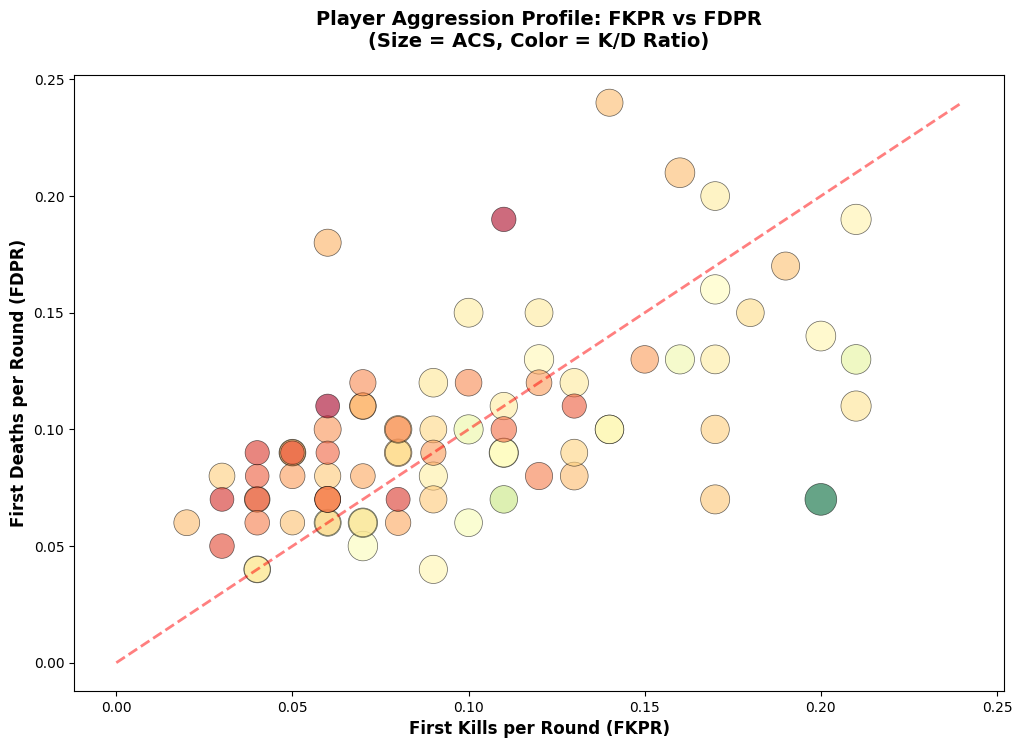

In [14]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(player_stats['fkpr'], player_stats['fdpr'],
                     s=player_stats['acs']*2, c=player_stats['kd_ratio'],
                     cmap='RdYlGn', alpha=0.6, edgecolors='black', linewidth=0.5)

plt.xlabel('First Kills per Round (FKPR)', fontsize=12, fontweight='bold')
plt.ylabel('First Deaths per Round (FDPR)', fontsize=12, fontweight='bold')
plt.title('Player Aggression Profile: FKPR vs FDPR\n(Size = ACS, Color = K/D Ratio)',
          fontsize=14, fontweight='bold', pad=20)

max_val = max(player_stats['fkpr'].max(), player_stats['fdpr'].max())
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, linewidth=2, label='Balanced (FK=FD)')

plt.savefig('fk_fd_scatter.png', dpi=300, bbox_inches='tight')
print(" Saved: fk_fd_scatter.png")


## 3.5 Economy Analysis


--- 4.3 Economy Impact Analysis ---

Average Win Rates by Economy Type:
  Eco: 43.7%
  Semi-Eco: 16.4%
  Semi-Buy: 51.9%
  Full Buy: 54.2%

 Saved: economy_analysis.png


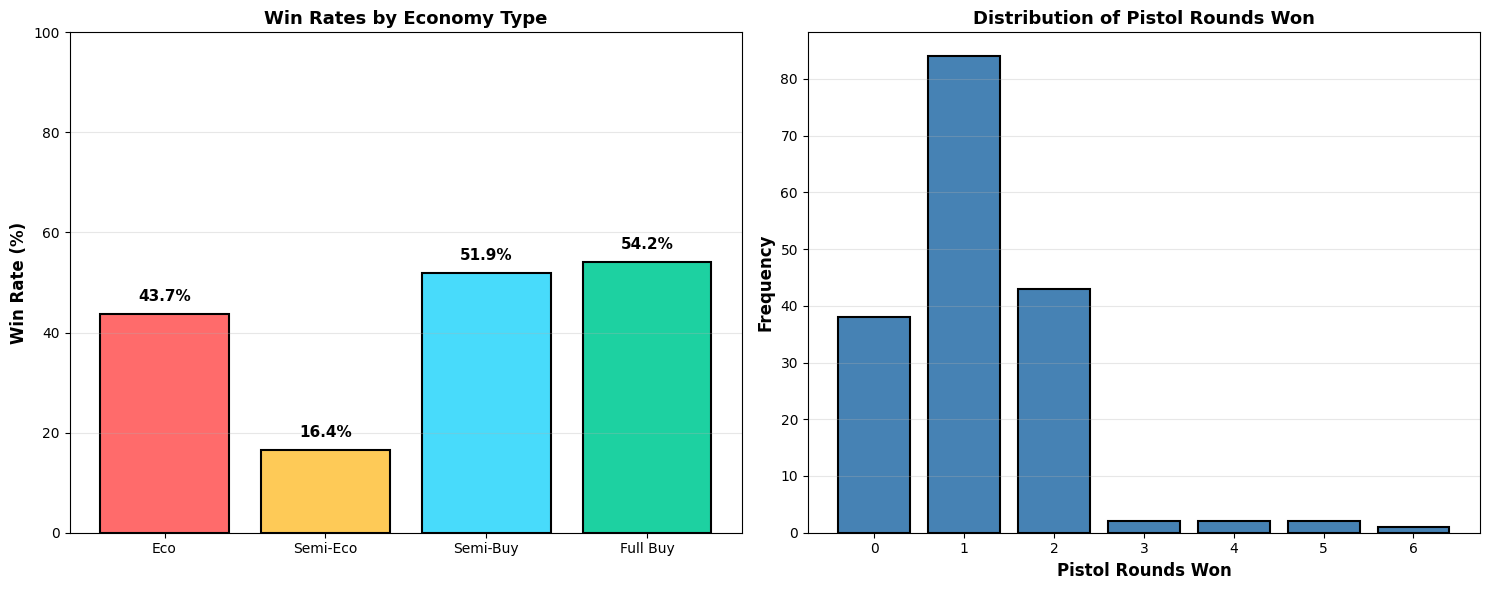


--- Pistol Round Impact ---
            Avg Eco WR  Avg Full Buy WR  Count
Pistol Won                                    
0                0.071            0.554     38
1                0.361            0.538     84
2                0.893            0.541     43
3                0.600            0.560      2
4                0.424            0.544      2
5                0.625            0.523      2
6                0.429            0.468      1


In [15]:
print("\n--- 4.3 Economy Impact Analysis ---")

# Filter out "All Maps" summary rows
economy_maps = economy[economy['map'] != 'All Maps'].copy()

print("\nAverage Win Rates by Economy Type:")
win_rates = {
    'Eco': economy_maps['eco_winrate'].mean(),
    'Semi-Eco': economy_maps['semi_eco_winrate'].mean(),
    'Semi-Buy': economy_maps['semi_buy_winrate'].mean(),
    'Full Buy': economy_maps['full_buy_winrate'].mean()
}
for buy_type, rate in win_rates.items():
    print(f"  {buy_type}: {rate:.1%}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Win rates bar chart
buy_types = list(win_rates.keys())
rates = [win_rates[bt] * 100 for bt in buy_types]
colors_eco = ['#ff6b6b', '#feca57', '#48dbfb', '#1dd1a1']

bars = axes[0].bar(buy_types, rates, color=colors_eco, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Win Rate (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Win Rates by Economy Type', fontsize=13, fontweight='bold')
axes[0].set_ylim(0, 100)

for bar, rate in zip(bars, rates):
    axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2,
                f'{rate:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

axes[0].grid(axis='y', alpha=0.3)

# Pistol round analysis
pistol_counts = economy_maps.groupby('Pistol Won').size()
axes[1].bar(pistol_counts.index, pistol_counts.values, color='steelblue',
           edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Pistol Rounds Won', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Pistol Rounds Won', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('economy_analysis.png', dpi=300, bbox_inches='tight')
print("\n Saved: economy_analysis.png")
plt.show()

# Pistol round impact
print("\n--- Pistol Round Impact ---")
pistol_groups = economy_maps.groupby('Pistol Won').agg({
    'eco_winrate': 'mean',
    'full_buy_winrate': 'mean',
    'Team': 'count'
}).round(3)
pistol_groups.columns = ['Avg Eco WR', 'Avg Full Buy WR', 'Count']
print(pistol_groups)


## 3.6 Map Analysis


--- 4.4 Map-Level Analysis ---

Most Played Maps:
map_name
Lotus      18
Abyss      14
Corrode    13
Bind       11
Sunset     11
Ascent     11
Haven      10
Name: count, dtype: int64

Score Differential Statistics:
  Mean: 1.15 rounds
  Median: 2 rounds
  Close games (≤5 rounds): 63 / 88 (71.6%)


C:\Users\Advait Shinde\AppData\Local\Temp\ipykernel_33776\1952088343.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()



 Saved: map_analysis.png


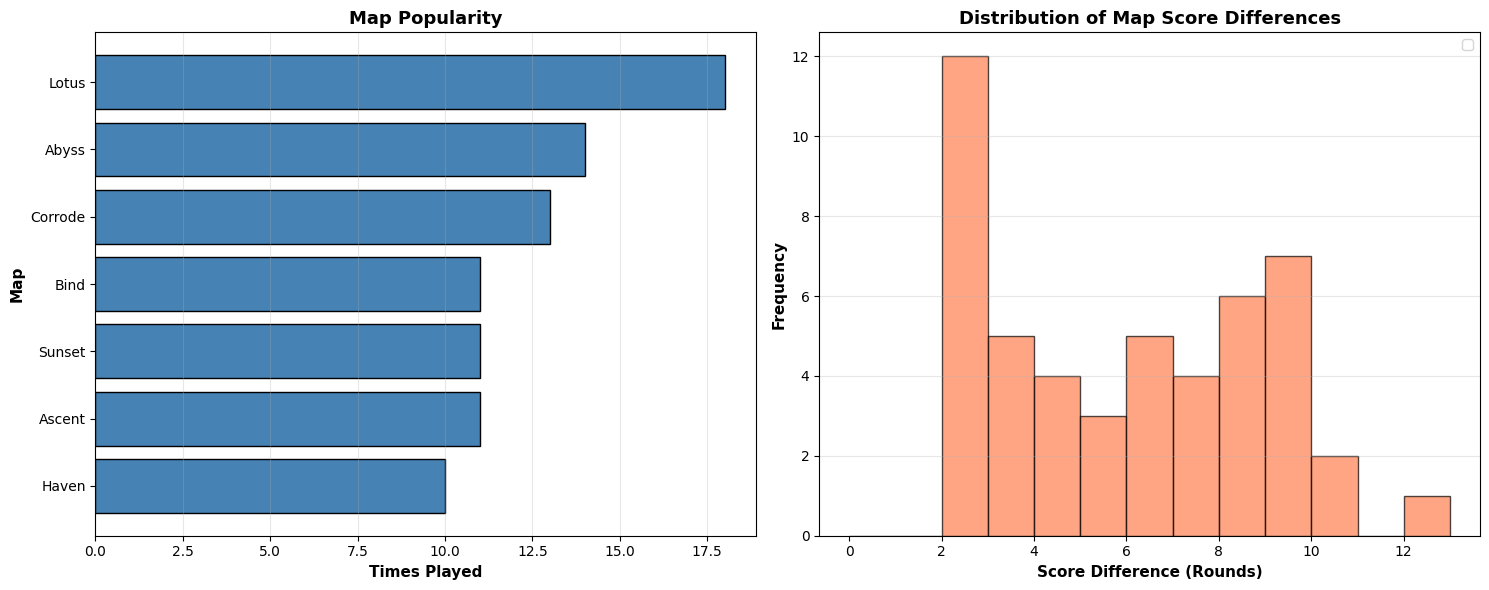


--- Top Teams by Map Wins ---
winner
NRG              13
DRX              13
FNATIC           13
Paper Rex         9
MIBR              9
Team Heretics     7
GIANTX            6
G2 Esports        6
Name: count, dtype: int64


In [16]:
print("\n--- 4.4 Map-Level Analysis ---")

# Map popularity
map_popularity = maps_stats['map_name'].value_counts()
print("\nMost Played Maps:")
print(map_popularity)

# Score differentials
print(f"\nScore Differential Statistics:")
print(f"  Mean: {maps_stats['score_diff'].mean():.2f} rounds")
print(f"  Median: {maps_stats['score_diff'].median():.0f} rounds")
print(f"  Close games (≤5 rounds): {(maps_stats['score_diff'] <= 5).sum()} / {len(maps_stats)} ({(maps_stats['score_diff'] <= 5).mean()*100:.1f}%)")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Map popularity
axes[0].barh(map_popularity.index, map_popularity.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Times Played', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Map', fontsize=11, fontweight='bold')
axes[0].set_title('Map Popularity', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Score distribution
axes[1].hist(maps_stats['score_diff'], bins=range(0, maps_stats['score_diff'].max()+2),
            color='coral', edgecolor='black', alpha=0.7)

axes[1].set_xlabel('Score Difference (Rounds)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Distribution of Map Score Differences', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('map_analysis.png', dpi=300, bbox_inches='tight')
print("\n Saved: map_analysis.png")
plt.show()

# Team performance
print("\n--- Top Teams by Map Wins ---")
team_wins = maps_stats['winner'].value_counts().head(8)
print(team_wins)

## 4. Questions for Hypthesis Testiing

Based on the exploratory analysis, I propose three hypothesis tests:

<br>

**1. QUESTION 1: Does First-Kill Advantage Predict Higher K/D Ratios?**
-------------------------------------------------------------------

- H₀: There is no correlation between FK-FD differential and K/D ratio (ρ = 0)
- H₁: There is a positive correlation between FK-FD differential and K/D ratio (ρ > 0)

- Variables: fk_fd_diff (continuous) vs kd_ratio (continuous)
- Rationale: Entry fraggers who secure first kills should have better K/D ratios
- Expected finding: Significant positive correlation

<br>

**2. QUESTION 2: Do Economy Win Rates Differ Significantly by Buy Type?**
-------------------------------------------------------------------
- H₀: μ_eco = μ_semi_eco = μ_semi_buy = μ_full_buy (all means equal)
- H₁: At least one buy type has a different mean win rate

- Variables: Buy type (categorical: 4 levels) vs Win rate (continuous)
- Rationale: Better equipment should lead to higher win rates
- Expected finding: Full Buy > Semi-Buy > Semi-Eco > Eco

<br>

**3. QUESTION 3: Does Pistol Round Success Correlate with Map Victory?**
------------------------------------------------------------------
- H₀: Winning more pistol rounds does not increase probability of map win
- H₁: Winning more pistol rounds increases probability of map win

- Variables: Pistol Won (0, 1, 2) vs Map outcome (win/loss)
- Rationale: Pistol rounds provide economy advantage for subsequent rounds
- Expected finding: Teams winning both pistols have higher map win rate



### **5. References**

[1] **Kaggle dataset:** Valorant Champions 2025 Paris - player & match data.  [Kaggle](https://www.kaggle.com/datasets/piyush86kumar/valorant-champions-tour-2025-paris)


